# Olist Brazilian E-Commerce - Geographic Visualization

### This script contains the following:

#### 1.   Import Libraries
#### 2.   Import Data Set: Orders_Items_Products_Reviews_Customers_Sellers 
#### 3.   Import Data Set: GeoLocation
#### 4.   Group the geolocation data by unique zip code prefixes.
#### 4.   Extrem value checks
#### 5.   Merge customers data set with geolocation data
#### 6.   Import Sellers data set
#### 7.   Merge sellers data with geolocation data
#### 8.   Merge customers data with seller data, containing geolocation data for both
#### 9.   Remaining Consistency Checks

### 1. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define a path
path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

### 2. Import Data Set: Orders_Items_Products_Reviews_Customers

In [6]:
customers_prods_reviews = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_items_prods_reviews_customers_merged.csv'), index_col = False)


In [7]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
customers_prods_reviews.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumery,Middle price,4,Muito boa a loja,Muito bom o produto.,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [9]:
customers_prods_reviews.shape

(108198, 19)

### 3. Import Data Set: GeoLocation

In [10]:
geo_location = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_geolocation.csv'))

In [33]:
geo_location.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [14]:
geo_location.shape

(1000163, 6)

In [16]:
# Drop unnecessary columns  from reviews dataframe

geo_location.drop(columns = 'Unnamed: 0', inplace = True)

#### Missing Values Checks

In [22]:
geo_location.isnull().sum() # No Missing Values!

zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

In [23]:
# Find duplicates

geo_location_dup = geo_location[geo_location.duplicated()]

In [27]:
geo_location_dup.shape

(133657, 5)

In [28]:
# Remove duplicates from geo_loc DataFrame

geo_loc_unique = geo_location.drop_duplicates()

In [29]:
geo_loc_unique.shape

(128174, 5)

### 4. Group the geolocation data by unique zip code prefixes.

In [30]:
# Make representative point data from zip code of geo_loc_unique

geo_rep_data = pd.DataFrame(dict(geolocation_lat=geo_loc_unique.groupby("zip_code_prefix").geolocation_lat.mean(),
                                geolocation_lng=geo_loc_unique.groupby("zip_code_prefix").geolocation_lng.mean())).reset_index()


In [43]:
geo_rep_data.shape

(15287, 3)

### 5. Merge customers data set with geolocation data

In [31]:
# Merge geo_rep_data_on customer data

geo_customers_combined = customers_prods_reviews.merge(geo_rep_data, left_on="customer_zip_code_prefix", right_on="zip_code_prefix")


In [34]:
geo_customers_combined.shape

(105573, 22)

In [52]:
geo_customers_combined.columns

Index(['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id', 'seller_id',
       'price', 'freight_value', 'prod_category', 'Price category',
       'review_score', 'review_title', 'review_comment', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'zip_code_prefix', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [82]:
geo_customers_combined.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.576475,-46.587290
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,2018-03-22 17:23:21,2018-03-25 17:22:41,2018-04-04 00:00:00,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,99.90,11.79,bed_bath_table,Middle price,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3149,-23.576475,-46.587290
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,2018-03-22 17:23:21,2018-03-25 17:22:41,2018-04-04 00:00:00,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,99.90,11.79,bed_bath_table,Middle price,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3149,-23.576475,-46.587290
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,2017-09-04 11:26:38,2017-09-05 19:20:20,2017-09-15 00:00:00,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,baby,Low price,5,NaN,O produto está ok e foi entregue bem antes do ...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.576475,-46.587290
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,3366,-23.564807,-46.533982


In [ ]:
geo_customers_combined.describe()

#### Export customers with geolocation data

In [78]:
# Exporting all data merged, without sellers data

geo_customers_combined.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_items_prods_reviews_customers_geo.csv'))

### 6. Import Sellers data set

In [70]:
df_sellers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_sellers_wrangled.csv'), index_col = False)

In [71]:
df_sellers.shape

(3095, 5)

In [72]:
df_sellers.head()

,Unnamed: 0,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 7. Merge sellers data with geolocation data

In [79]:
# Merge geo_rep_data_on sellers data

geo_location_sellers_merged = df_sellers.merge(geo_rep_data, left_on="seller_zip_code_prefix", right_on="zip_code_prefix")

In [80]:
geo_location_sellers_merged.shape

(3023, 8)

In [81]:
geo_location_sellers_merged.columns

Index(['Unnamed: 0', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'zip_code_prefix', 'geolocation_lat',
       'geolocation_lng'],
      dtype='object')

In [83]:
# Rename columns 

geo_location_sellers_merged.rename(columns = {'zip_code_prefix' : 'zip_code_prefix_seller', 'geolocation_lat': 'seller_geolocation_lat', 
                     'geolocation_lng': 'seller_geolocation_lng' }, inplace = True)

### 8. Merge customers data with seller data, containing geolocation data for both

In [87]:
# Merge geo_rep_data_on sellers data

df_all_merged = geo_customers_combined.merge(geo_location_sellers_merged, on= 'seller_id', indicator = True)

### 9. Remaining Consistency Checks

In [88]:
df_all_merged.shape

(101992, 30)

In [ ]:
df_all_merged['_merge'].value_counts(dropna= False)

In [ ]:
df_all_merged.head(100)

In [ ]:
df_all_merged.columns

In [95]:
# Rename columns 

df_all_merged.rename(columns = {'geolocation_lat' : 'customer_geolocation_lat', 'geolocation_lng': 'customer_geolocation_lng'}, inplace = True)

In [ ]:
df_all_merged.columns

In [98]:
# Drop unnecessary columns

df_all_merged = df_all_merged.drop(columns = ['zip_code_prefix', 'Unnamed: 0'])

In [104]:
# check head

df_all_merged.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593


In [100]:
# Drop unnecessary columns

df_all_merged = df_all_merged.drop(columns = ['zip_code_prefix_seller', '_merge'])

In [101]:
df_all_merged.shape

(101992, 26)

In [102]:
# check head

df_all_merged.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593


In [ ]:
df_all_merged.info()

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

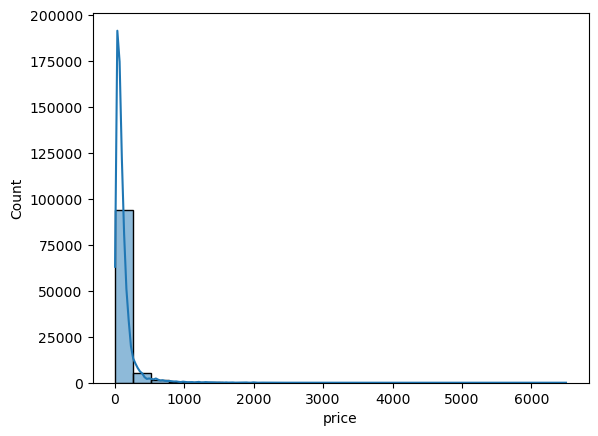

In [103]:
sns.histplot(df_all_merged['price'], bins=25, kde = True) # shows extreme values for 'price'

### 10. Export the final version of the data set

In [107]:
# Export all merged data set

df_all_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_merged.csv'), index = False)